## Importando Bibliotecas

In [1]:
import requests
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Adquirindo e Consolidando os Dados

In [2]:
### Pegando dados do meu github

url_csv = 'https://raw.githubusercontent.com/RatonesR/pos_graduacao_maua/main/machine_learning/atividade1/sao-paulo-properties-april-2019.csv'
df = pd.read_csv(url_csv)

df.head()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436


In [3]:
df.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,1.364000e+04,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.000000,13640.00000,13640.000000,13640.000000,13640.000000
mean,2.877378e+05,689.882331,84.373900,2.312023,2.073680,0.980792,1.393182,0.354179,0.146774,0.51217,0.015616,-22.077047,-43.597088
std,5.908214e+05,757.649363,58.435676,0.777461,0.961803,0.834891,0.829932,0.478281,0.353894,0.49987,0.123988,5.866633,11.487288
min,4.800000e+02,0.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-46.749039,-58.364352
25%,1.858750e+03,290.000000,50.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,-23.594552,-46.681671
50%,8.100000e+03,500.000000,65.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.00000,0.000000,-23.552813,-46.637255
75%,3.600000e+05,835.000000,94.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.00000,0.000000,-23.517640,-46.560040
max,1.000000e+07,9500.000000,880.000000,10.000000,8.000000,6.000000,9.000000,1.000000,1.000000,1.00000,1.000000,0.000000,0.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13640 entries, 0 to 13639
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             13640 non-null  int64  
 1   Condo             13640 non-null  int64  
 2   Size              13640 non-null  int64  
 3   Rooms             13640 non-null  int64  
 4   Toilets           13640 non-null  int64  
 5   Suites            13640 non-null  int64  
 6   Parking           13640 non-null  int64  
 7   Elevator          13640 non-null  int64  
 8   Furnished         13640 non-null  int64  
 9   Swimming Pool     13640 non-null  int64  
 10  New               13640 non-null  int64  
 11  District          13640 non-null  object 
 12  Negotiation Type  13640 non-null  object 
 13  Property Type     13640 non-null  object 
 14  Latitude          13640 non-null  float64
 15  Longitude         13640 non-null  float64
dtypes: float64(2), int64(11), object(3)
memo

## Limpando e Verificando Conformidade dos Dados

In [5]:
df.shape

(13640, 16)

In [6]:
df.isnull().sum()

,0
Price,0
Condo,0
Size,0
Rooms,0
Toilets,0
Suites,0
Parking,0
Elevator,0
Furnished,0
Swimming Pool,0


In [7]:
colunas_object = df.select_dtypes(include=['object']).columns
for col in colunas_object:
  df[col] = df[col].astype('string')

df.dtypes

,0
Price,int64
Condo,int64
Size,int64
Rooms,int64
Toilets,int64
Suites,int64
Parking,int64
Elevator,int64
Furnished,int64
Swimming Pool,int64


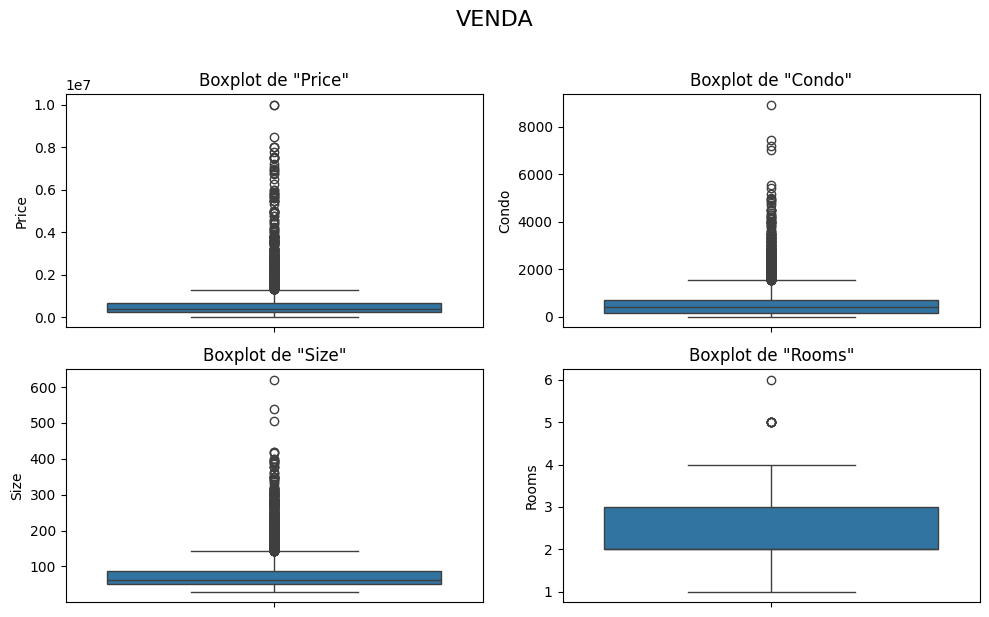

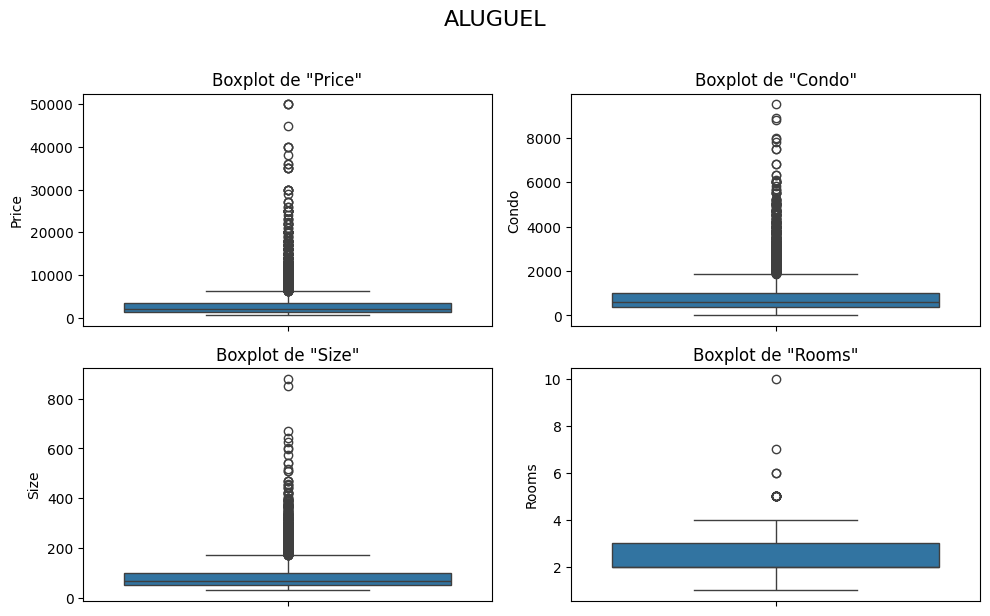

In [8]:
df_venda = df[df['Negotiation Type'] == 'sale'].copy()
df_aluguel = df[df['Negotiation Type'] == 'rent'].copy()

colunas_para_analise = ['Price', 'Condo', 'Size', 'Rooms']

# VENDA (preço em dezenas de milhares)
plt.figure(figsize=(10, 6))
plt.suptitle('VENDA', fontsize=16, y=1.02)

for i, coluna in enumerate(colunas_para_analise):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_venda[coluna])
    plt.title(f'Boxplot de "{coluna}"')

plt.tight_layout()
plt.show()


# ALUGUEL
plt.figure(figsize=(10, 6))
plt.suptitle('ALUGUEL', fontsize=16, y=1.02)

for i, coluna in enumerate(colunas_para_analise):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df_aluguel[coluna])
    plt.title(f'Boxplot de "{coluna}"')

plt.tight_layout()
plt.show()

In [9]:
# Removendo outliers dos dois dataframes

def remove_outliers_iqr(df, colunas):
    for coluna in colunas:
        Q1 = df[coluna].quantile(0.25)
        Q3 = df[coluna].quantile(0.75)
        IQR = Q3 - Q1

        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        tamanho_antes = len(df)
        df = df[(df[coluna] >= limite_inferior) & (df[coluna] <= limite_superior)]
        print(f"Outliers da coluna '{coluna}' removidos. {tamanho_antes - len(df)} linhas eliminadas.")

    return df

colunas_para_limpar = ['Price', 'Condo', 'Size', 'Rooms']

print("REMOVENDO OUTLIERS DE VENDA")
df_venda = remove_outliers_iqr(df_venda, colunas_para_limpar)
print("REMOVENDO OUTLIERS DE ALUGUEL")
df_aluguel = remove_outliers_iqr(df_aluguel, colunas_para_limpar)

REMOVENDO OUTLIERS DE VENDA
Outliers da coluna 'Price' removidos. 519 linhas eliminadas.
Outliers da coluna 'Condo' removidos. 210 linhas eliminadas.
Outliers da coluna 'Size' removidos. 338 linhas eliminadas.
Outliers da coluna 'Rooms' removidos. 1 linhas eliminadas.
REMOVENDO OUTLIERS DE ALUGUEL
Outliers da coluna 'Price' removidos. 671 linhas eliminadas.
Outliers da coluna 'Condo' removidos. 428 linhas eliminadas.
Outliers da coluna 'Size' removidos. 421 linhas eliminadas.
Outliers da coluna 'Rooms' removidos. 0 linhas eliminadas.


In [10]:
# Criando novas colunas - Preço por Metro Quadrado; Imóveis com Suítes

df_venda['preco_m2'] = df_venda['Price'] / df_venda['Size']
df_venda['possui_suite'] = (df_venda['Suites'] > 0).astype(int)

df_aluguel['preco_m2'] = df_aluguel['Price'] / df_aluguel['Size']
df_aluguel['possui_suite'] = (df_aluguel['Suites'] > 0).astype(int)

## Análise Exploratória

In [11]:
print("----------------------------------------------------------------------------------------------- VENDA ------------------------------------------------------------------------------------------------------")
display(df_venda.head())
print()
print("---------------------------------------------------------------------------------------------- ALUGUEL ------------------------------------------------------------------------------------------")
display(df_aluguel.head())

----------------------------------------------------------------------------------------------- VENDA ------------------------------------------------------------------------------------------------------


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,preco_m2,possui_suite
4901,732600,1000,74,1,2,1,2,1,0,1,0,Vila Madalena/São Paulo,sale,apartment,-23.552129,-46.692244,9900.000000,1
4903,720000,700,70,2,2,1,1,1,0,1,1,Vila Madalena/São Paulo,sale,apartment,-23.547687,-46.692594,10285.714286,1
4905,1200000,900,56,2,2,1,2,0,1,1,0,Vila Madalena/São Paulo,sale,apartment,-23.553087,-46.697890,21428.571429,1
4911,720000,900,73,2,2,1,1,1,0,0,0,Vila Madalena/São Paulo,sale,apartment,-23.544957,-46.693206,9863.013699,1
4912,1100000,1000,94,3,3,1,1,1,0,0,0,Vila Madalena/São Paulo,sale,apartment,-23.543664,-46.704285,11702.127660,1



---------------------------------------------------------------------------------------------- ALUGUEL ------------------------------------------------------------------------------------------


,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude,preco_m2,possui_suite
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486,19.787234,1
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718,22.222222,1
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665,20.833333,1
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014,20.833333,1
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436,23.636364,1


Distribuição de preços para os dois tipos de negociação



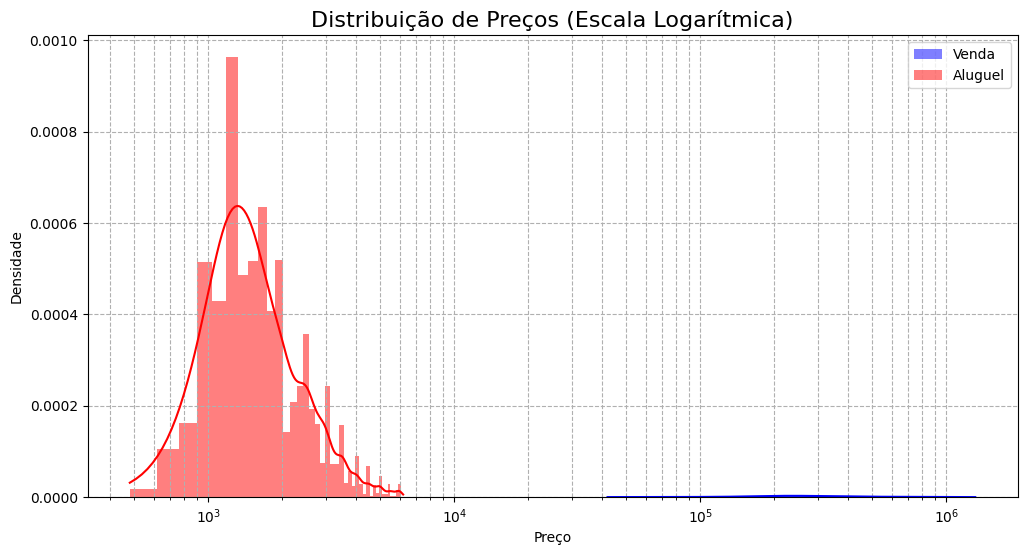

In [12]:
print("Distribuição de preços para os dois tipos de negociação")
print()

plt.figure(figsize=(12, 6))

sns.histplot(df_venda['Price'], color="blue", label='Venda', kde=True, stat='density', lw=0)
sns.histplot(df_aluguel['Price'], color="red", label='Aluguel', kde=True, stat='density', lw=0)

# Escala log para visualizar melhor venda e aluguel no mesmo gráfico
plt.xscale('log')
plt.title('Distribuição de Preços (Escala Logarítmica)', fontsize=16)
plt.xlabel('Preço')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

Verificamos que a separação em dois dataframes foi uma decisão certa. Épossível perceber como os dois intervalos de preço são completamente diferentes em magnitude.

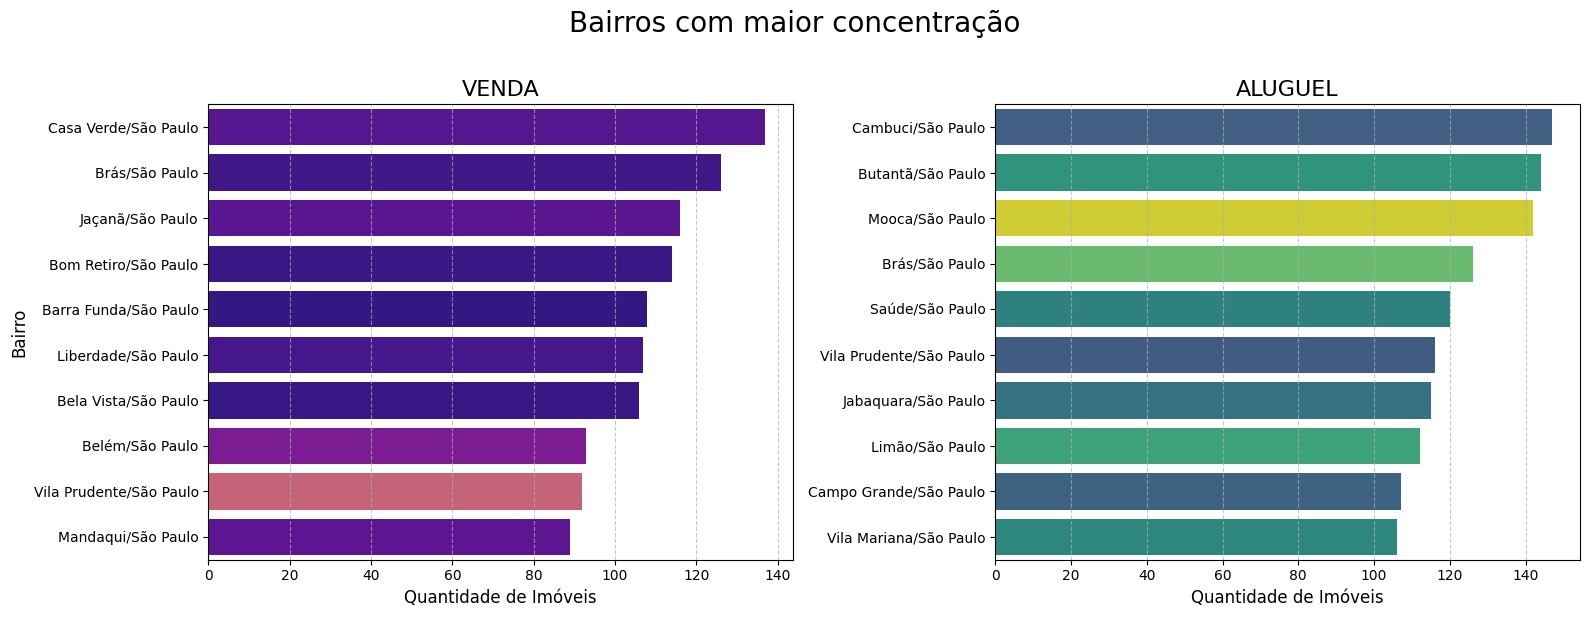

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Bairros com maior concentração', fontsize=20, y=1.02)

# VENDA
sns.countplot(
    ax=axes[0],
    data=df_venda,
    y='District',
    hue='District',
    order=df_venda['District'].value_counts().index[:10],
    palette='plasma'
)
axes[0].set_title('VENDA', fontsize=16)
axes[0].set_xlabel('Quantidade de Imóveis', fontsize=12)
axes[0].set_ylabel('Bairro', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# ALUGUEL
sns.countplot(
    ax=axes[1],
    data=df_aluguel,
    y='District',
    hue='District',
    order=df_aluguel['District'].value_counts().index[:10],
    palette='viridis'
)
axes[1].set_title('ALUGUEL', fontsize=16)
axes[1].set_xlabel('Quantidade de Imóveis', fontsize=12)
axes[1].set_ylabel('')
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

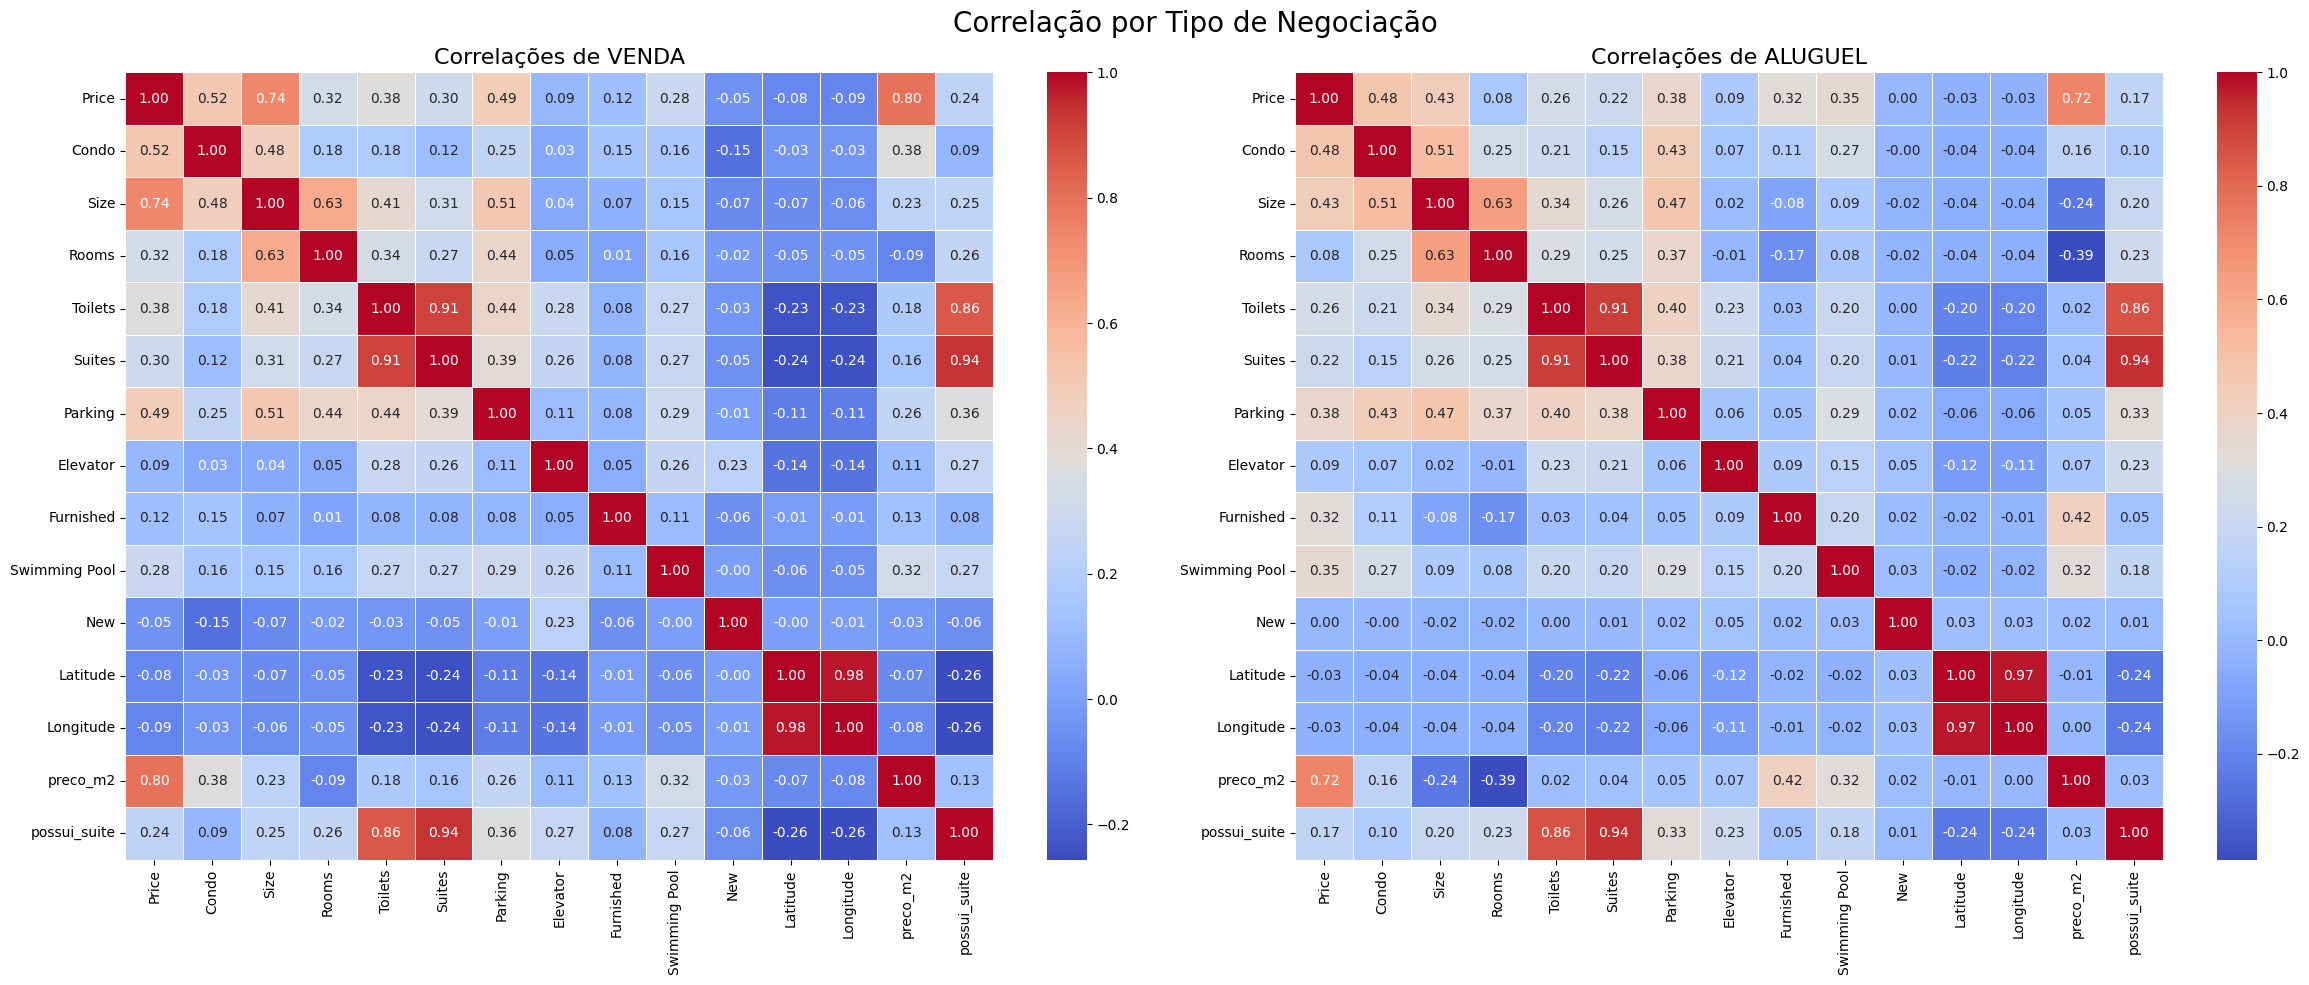

In [14]:
# MATRIZ CORRELAÇÃO

corr_venda = df_venda.corr(numeric_only=True)
corr_aluguel = df_aluguel.corr(numeric_only=True)

fig, axes = plt.subplots(1, 2, figsize=(24, 10))
fig.suptitle('Correlação por Tipo de Negociação', fontsize=20)

# VENDA
sns.heatmap(
    ax=axes[0],
    data=corr_venda,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
axes[0].set_title('Correlações de VENDA', fontsize=16)

# ALUGUEL
sns.heatmap(
    ax=axes[1],
    data=corr_aluguel,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)
axes[1].set_title('Correlações de ALUGUEL', fontsize=16)

plt.tight_layout()
plt.show()

Venda:
- Correlação positiva (mais forte): price e size
- Correlação positiva moderada: price e rooms, toilets, suites, parking
- Correlação positiva: price e condo

Aluguel
- Correlação positiva moderada: price e size
- Correlação positiva (mais forte): price e condo
- Correlação positiva moderada: price e toilets, suites, parking

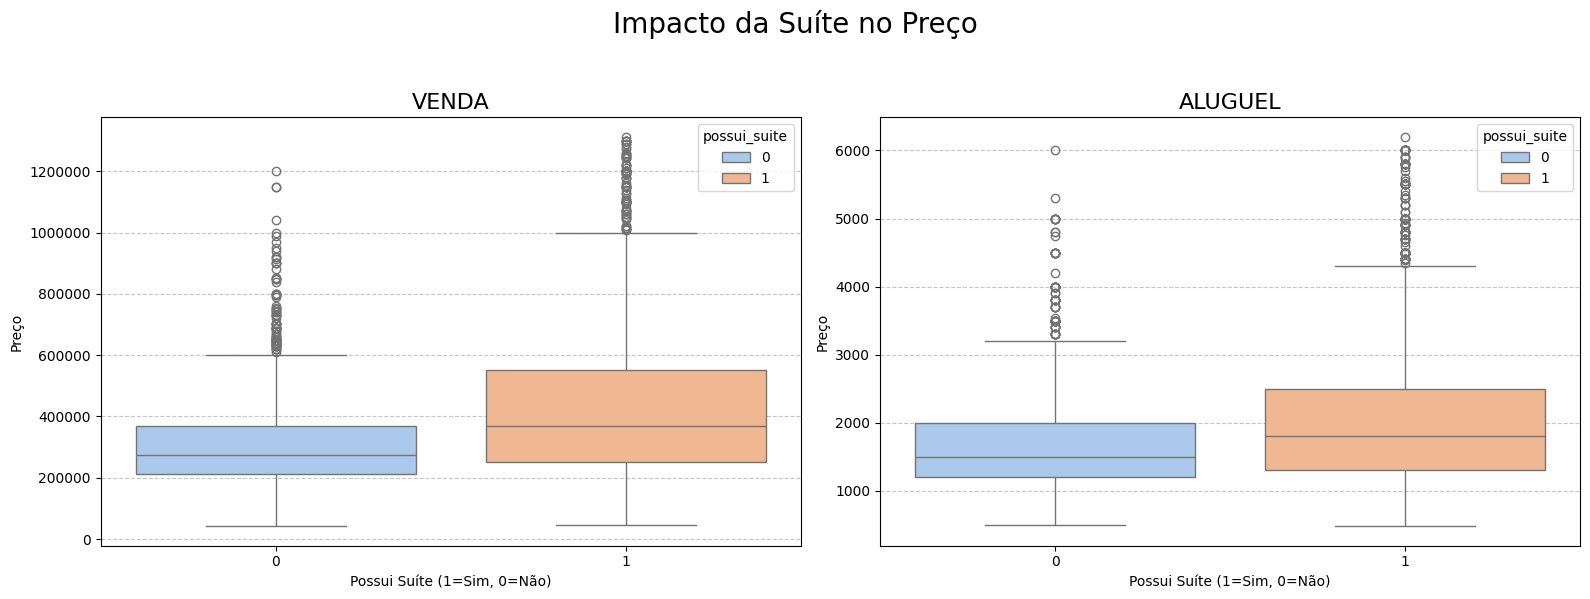

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=False)
fig.suptitle('Impacto da Suíte no Preço', fontsize=20, y=1.02)

# VENDA
sns.boxplot(ax=axes[0], data=df_venda, x='possui_suite', y='Price', hue='possui_suite', palette='pastel')
axes[0].set_title('VENDA', fontsize=16)
axes[0].set_xlabel('Possui Suíte (1=Sim, 0=Não)')
axes[0].set_ylabel('Preço')
axes[0].ticklabel_format(style='plain', axis='y')
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# ALUGUEL
sns.boxplot(ax=axes[1], data=df_aluguel, x='possui_suite', y='Price', hue='possui_suite', palette='pastel')
axes[1].set_title('ALUGUEL', fontsize=16)
axes[1].set_xlabel('Possui Suíte (1=Sim, 0=Não)')
axes[1].set_ylabel('Preço')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

## Seleção e Preparação de Variáveis

In [16]:
df_aluguel.columns

Index(['Price', 'Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking',
       'Elevator', 'Furnished', 'Swimming Pool', 'New', 'District',
       'Negotiation Type', 'Property Type', 'Latitude', 'Longitude',
       'preco_m2', 'possui_suite'],
      dtype='object')

In [17]:
df_modelo = df_aluguel.copy()

colunas_numericas = ['Condo', 'Size', 'Rooms', 'Toilets', 'Suites', 'Parking', 'Elevator', 'Furnished', 'Swimming Pool', 'New']
colunas_categoricas = ['Property Type', 'District']
coluna_alvo = ['Price']

top_10_bairros = df_modelo['District'].value_counts().index[:10]
df_modelo['District'] = df_modelo['District'].apply(lambda x: x if x in top_10_bairros else 'Outros')

df_para_modelo = df_modelo[colunas_numericas + colunas_categoricas + coluna_alvo]

In [18]:
df_encoded = pd.get_dummies(df_para_modelo, columns=colunas_categoricas, drop_first=True, dtype=int)

display(df_encoded.head())

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,...,District_Butantã/São Paulo,District_Cambuci/São Paulo,District_Campo Grande/São Paulo,District_Jabaquara/São Paulo,District_Limão/São Paulo,District_Mooca/São Paulo,District_Outros,District_Saúde/São Paulo,District_Vila Mariana/São Paulo,District_Vila Prudente/São Paulo
0,220,47,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,148,45,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,100,48,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,200,48,2,2,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,410,55,2,2,1,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
y = df_encoded['Price']
X = df_encoded.drop('Price', axis=1)

## Treinamento do Modelo

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
modelo_final = LinearRegression()
modelo_final.fit(X_train, y_train)

LinearRegression()

## Coeficientes do Modelo e Qualidade do Ajuste

In [22]:
y_pred = modelo_final.predict(X_test)

r2 = metrics.r2_score(y_test, y_pred)
mae = metrics.mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print(f"Coeficiente de Determinação (R²): {r2:.4f}")
print(f"Erro Absoluto Médio (MAE): R$ {mae:,.2f}")
print(f"Raiz do Erro Quadrático Médio (RMSE): R$ {rmse:,.2f}")

Coeficiente de Determinação (R²): 0.4542
Erro Absoluto Médio (MAE): R$ 516.40
Raiz do Erro Quadrático Médio (RMSE): R$ 707.30


In [23]:
# Função para o cálculo do coeficiente de determinação da regressão
# linear simples (R^2) ou múltipla (R^2 ajustado):

def R2_R2ajust(estimador,X,y):
  R2 = estimador.score(X,y)  # R^2
  n = len(y)      # Quantidade de dados de treino
  m = X.shape[1]  # Quantidade de variáveis independentes do modelo
  if m == 1:
    return R2   # Regressão simples: retorna R^2
  else:
    return 1-((n-1)/(n-m-1))*(1-R2)  # Regressão múltipla: R^2 ajustado

In [24]:
print("Coeficiente de determinação AJUSTADO:", R2_R2ajust(modelo_final,X,y))

Coeficiente de determinação AJUSTADO: 0.4599380340908995


In [25]:
coeficientes = pd.DataFrame(modelo_final.coef_, X.columns, columns=['Coeficiente'])

display(coeficientes.sort_values(by='Coeficiente', ascending=False))

,Coeficiente
Furnished,645.080653
District_Vila Mariana/São Paulo,413.953649
Swimming Pool,400.140825
Parking,174.897331
District_Cambuci/São Paulo,87.855905
Toilets,61.120239
Suites,47.213473
Size,21.299118
District_Saúde/São Paulo,19.684623
New,17.004812


## Validação Cruzada k-folds

In [26]:
# Importação da bilioteca necessária
from sklearn.model_selection import cross_val_score

# Parâmetros da função 'cross_val_score':
#   estimator = um estimador (neste caso, um objeto da classe 'LinearRegression')
#   X,y = arrays (ou equivalentes) das variáveis independentes (X) e dependente (y)
#   cv = número [inteiro] de partições (k); valor padrão: k = 5
#   scoring = texto indicativo da métrica de qualidade a ser calculada
# Retorno:
#   array (Numpy) com os k valores da métrica selecionada

# Executa a validação cruzada k-folds, com k = 10, avaliando a métrica RMSE
aval = -cross_val_score(modelo_final,X,y,cv = 10,scoring = 'neg_root_mean_squared_error')

# Calcula o coeficiente de variação das avaliações = desvio padrão/média
# Critério:
# Até 20%: variação baixa
# De 20% a 60%: variação moderada
# Acima de 60%: variação alta

print("Valores de RMSE obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("RMSE médio =",aval.mean())
print("Coeficiente de variação (%) =",100*aval.std(ddof = 1)/aval.mean())

Valores de RMSE obtidos: [649.54410177 688.14896706 681.04138231 702.07688094 570.08307049
 872.46957922 749.96290777 815.51897225 694.17456324 766.41123292]

RMSE médio = 718.9431657967128
Coeficiente de variação (%) = 11.944650887152882


In [27]:
# Executa a validação cruzada k-folds, com k = 10, avaliando a métrica MAPE
aval = -cross_val_score(modelo_final,X,y,cv = 10,scoring = 'neg_mean_absolute_percentage_error')

print("Valores de MAPE obtidos:",aval)
print("")   # "Imprime" uma linha em branco
print("MAPE médio =",aval.mean())
print("Desvio padrão =",aval.std(ddof = 1))

Valores de MAPE obtidos: [0.39851347 0.30922656 0.2820275  0.24666669 0.31685217 0.26924267
 0.25955647 0.31377334 0.28700859 0.25892643]

MAPE médio = 0.2941793895679423
Desvio padrão = 0.04413350772600301


## Previsão

In [47]:
imovel_para_previsao = {
    'Condo': 1800,
    'Size': 150,
    'Rooms': 3,
    'Toilets': 3,
    'Suites': 1,
    'Parking': 2,
    'Elevator': 1,
    'Furnished': 1,
    'New': 0,
    'Property Type': 'Apartment',
    'District': 'Jabaquara/São Paulo'
}

df_previsao_aluguel = pd.DataFrame([imovel_para_previsao])

display(df_previsao_aluguel)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,New,Property Type,District
0,1800,150,3,3,1,2,1,1,0,Apartment,Jabaquara/São Paulo


In [59]:
df_previsao_aluguel_encoded = pd.get_dummies(df_previsao_aluguel, columns=colunas_categoricas, drop_first=True, dtype=int)

df_previsao_aluguel_final = df_previsao_aluguel_encoded.reindex(columns=X.columns, fill_value=0)

df_previsao_aluguel_final['District_Jabaquara/São Paulo'] = 1

display(df_previsao_aluguel_final)

,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District_Butantã/São Paulo,District_Cambuci/São Paulo,District_Campo Grande/São Paulo,District_Jabaquara/São Paulo,District_Limão/São Paulo,District_Mooca/São Paulo,District_Outros,District_Saúde/São Paulo,District_Vila Mariana/São Paulo,District_Vila Prudente/São Paulo
0,1800,150,3,3,1,2,1,1,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
# Usa o modelo de VENDA ('modelo_final') para prever o valor
valor_aluguel_previsto = modelo_final.predict(df_previsao_aluguel_final)

# O resultado da previsão é um array, então pegamos o primeiro (e único) elemento
valor = valor_aluguel_previsto[0]

print(f"\nPrevisão do aluguel: R$ {valor:,.2f}")


Previsão do aluguel: R$ 4,545.66


##